In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
#now plot climatology
import cartopy.feature as cfeature

def plot_background(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 125., -30., 20.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5,)
    gl.top_labels = False
    gl.right_labels = False
    if i == 5:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax
def plot_var_c(vari, vmin, vmax, name, cm):
    lons = vari.lon
    lats = vari.lat
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), sharey='all', sharex='all', 
                                 subplot_kw={'projection':ccrs.PlateCarree()})
    for i in range(0,6):

        axes[i, 0].pcolormesh(lons, lats, (vari).sel(month = i+1), cmap = cm, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,0], i, 0)
        mon = i+1
        axes[i, 0].set_title('Month = '+str(mon))
        #2nd collumn
        im = axes[i, 1].pcolormesh(lons, lats, (vari).sel(month = i+7), cmap = cm, 
                                    #colorbar=True, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,1], i, 1)
        mon2 = i+7
        axes[i, 1].set_title('Month = '+str(mon2))
    cbar_ax = fig.add_axes([0.95, 0.45, 0.05, 0.25])
    fig.colorbar(im, cax=cbar_ax)
    axes[0,0].text(1.5,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
            rotation='horizontal', rotation_mode='anchor',
            transform=axes[0,0].transAxes)
    return fig

In [3]:
#load in access T, dT, TC and TCM data

In [4]:
aTCM = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/TC_ML.nc').level
aTC = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/TC_.nc').level
aT_clim = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/Tclim.nc').thetao
adT_clim = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/dTclim.nc').__xarray_dataarray_variable__

aM = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/MLOTST/mlotst_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').mlotst.sel(lat=slice(-40,30),lon=slice(30,125))
aM = aM.groupby('time.month').mean('time')

In [5]:
#load in GODAS T, dT, TC and TCM data

In [6]:
gTCM = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/climatology/TC_ML.nc').level
gTC = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/climatology/TC_.nc').level
gT_clim = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/climatology/Tclim.nc').pottmp
gdT_clim = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/climatology/dTclim.nc').__xarray_dataarray_variable__

gM = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/dbss_obml/*.nc').dbss_obml.sel(lat=slice(-40,30),lon=slice(30,125))
gM = gM.groupby('time.month').mean('time')

In [7]:
#cerate animation of thermocline depth/dome
def plot_background_(ax):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 125., -30., 20.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5,)
    gl.top_labels = False
    gl.right_labels = False
    return ax
def plot_var_c(vari, vmin, vmax, name, cm):
    lons = vari.lon
    lats = vari.lat
    for i in range(0,12):
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey='all', sharex='all', 
                                 subplot_kw={'projection':ccrs.PlateCarree()})
        im = axes.pcolormesh(lons, lats, (vari).sel(month = i+1), cmap = cm, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background_(axes)
        mon = i+1
        axes.set_title('Month = '+str(mon))
        
        cbar_ax = fig.add_axes([0.95, 0.45, 0.05, 0.25])
        fig.colorbar(im, cax=cbar_ax)
    #axes.text(1.5,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
    #        rotation='horizontal', rotation_mode='anchor',
    #       transform=axes.transAxes)
    return fig

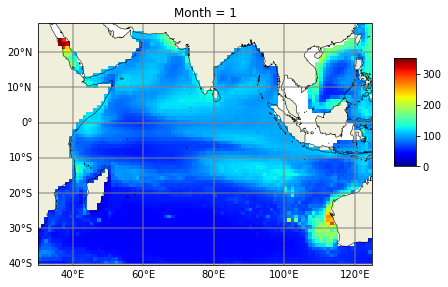

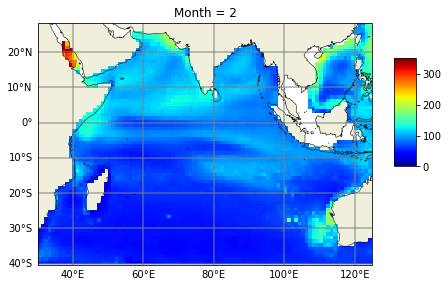

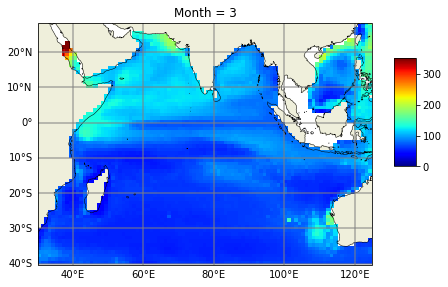

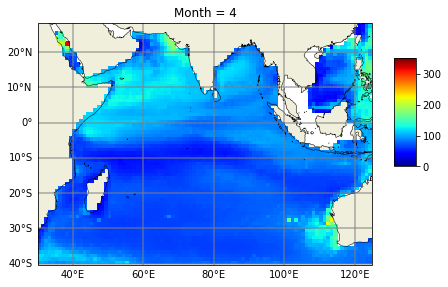

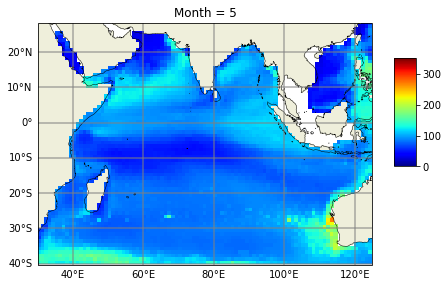

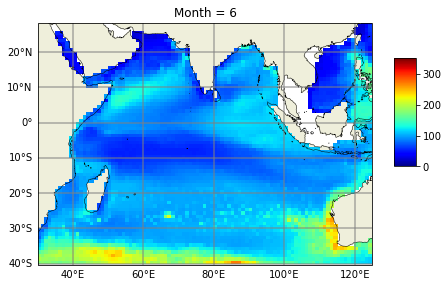

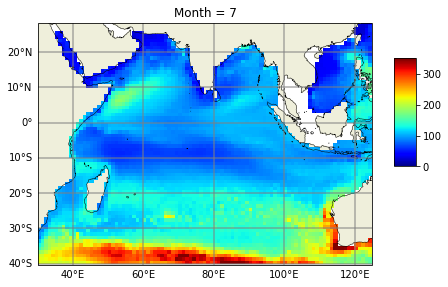

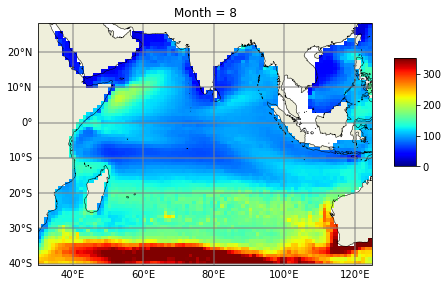

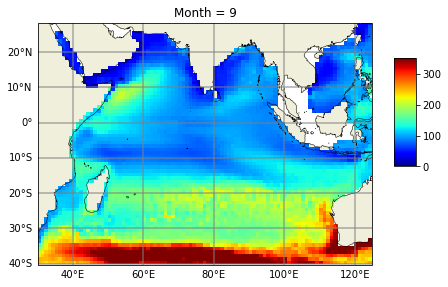

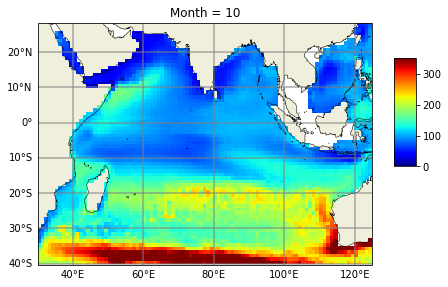

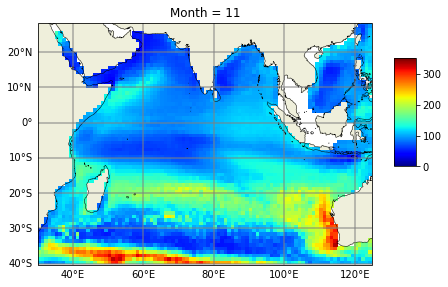

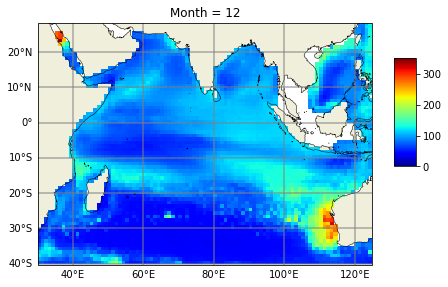

In [8]:
a = plot_var_c((gTCM), 0, 350, 'TC depth GODAS', 'jet')

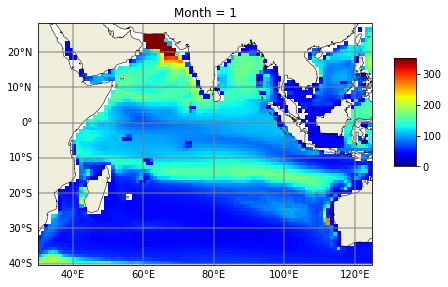

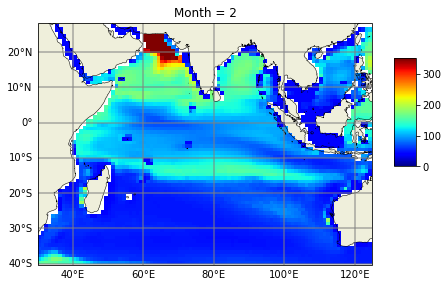

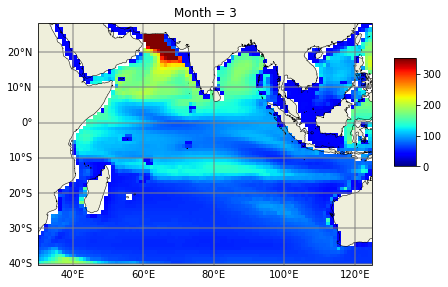

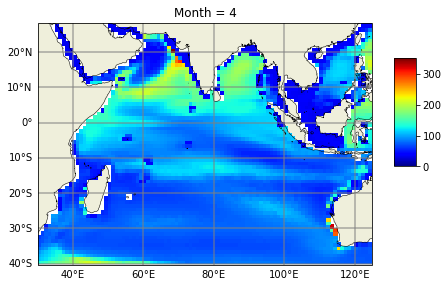

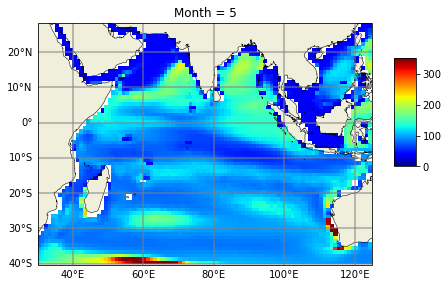

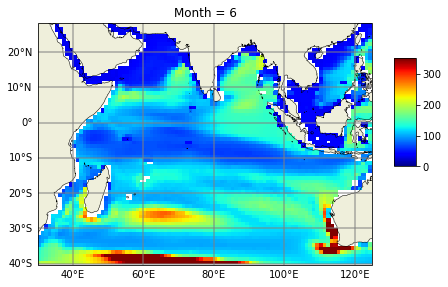

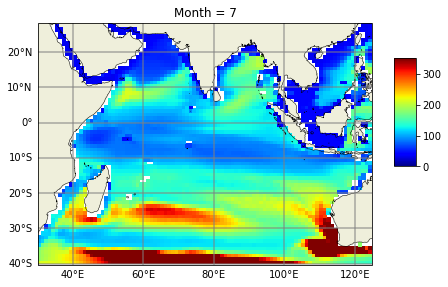

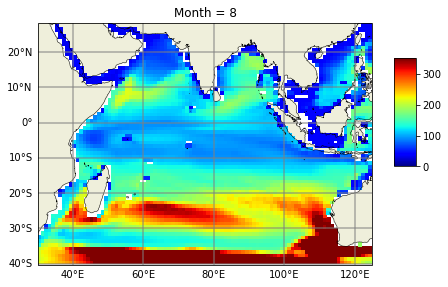

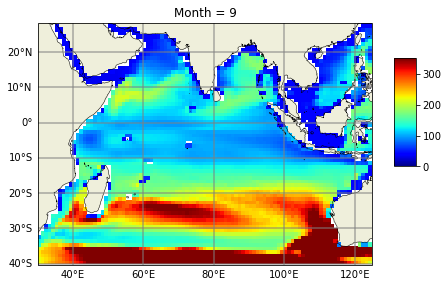

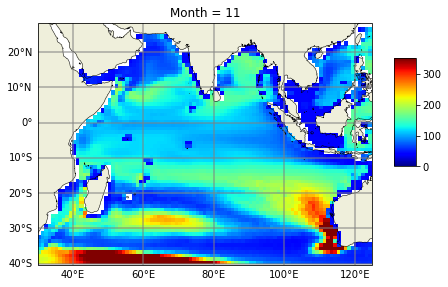

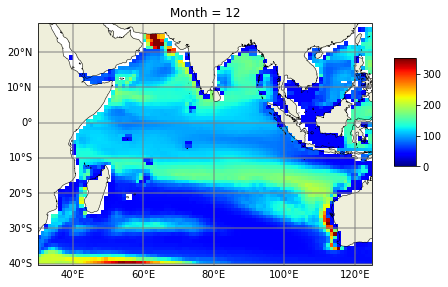

In [9]:
a = plot_var_c((aTCM), 0, 350, 'TC depth ACCESS', 'jet')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

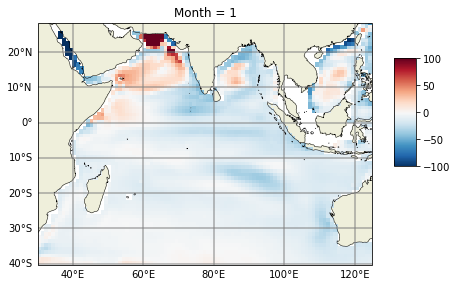

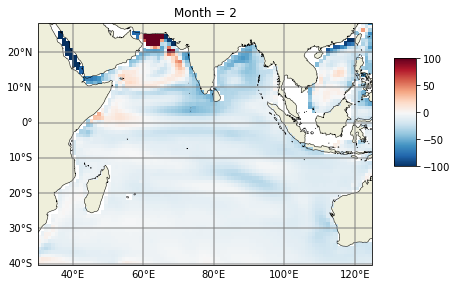

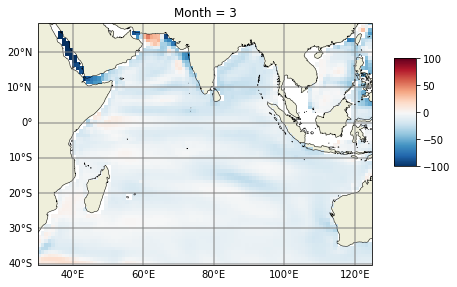

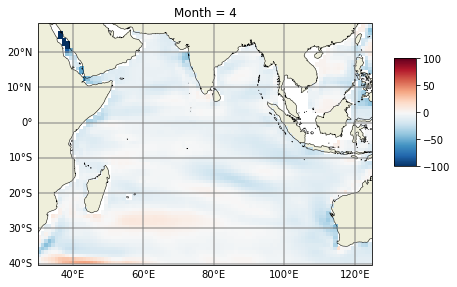

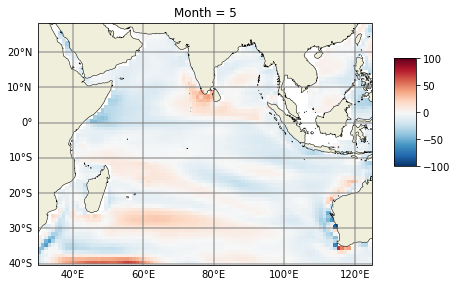

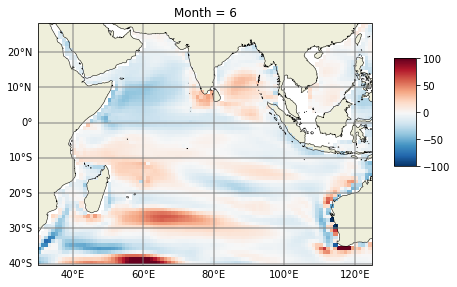

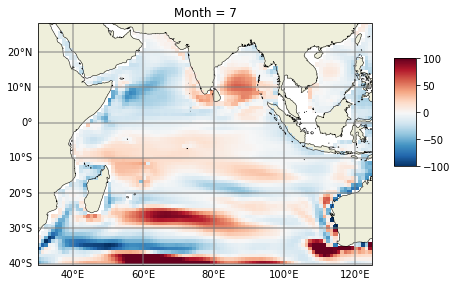

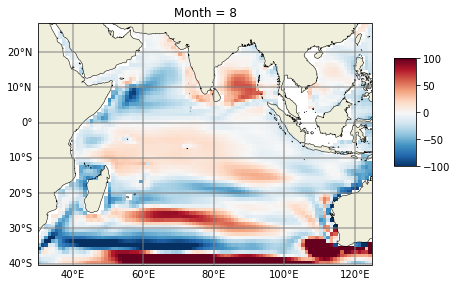

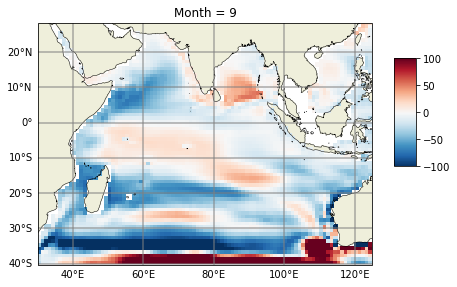

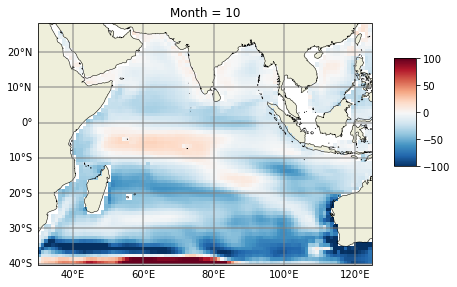

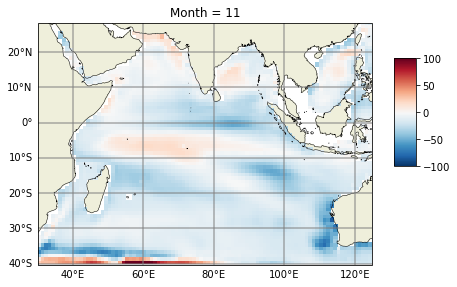

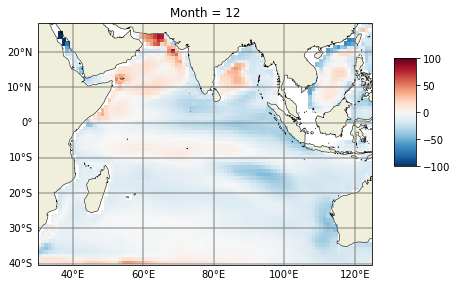

In [10]:
#now plot the difference in MLD for GODAS and ACCESS
a = plot_var_c((aM - gM), -100, 100, 'ACCESS-CM2 - GODAS MLD diff', 'RdBu_r')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

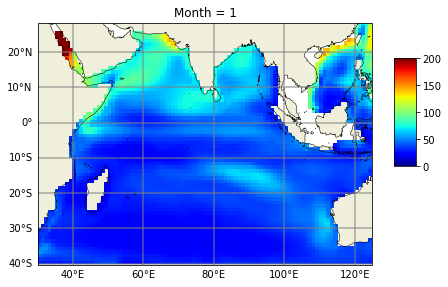

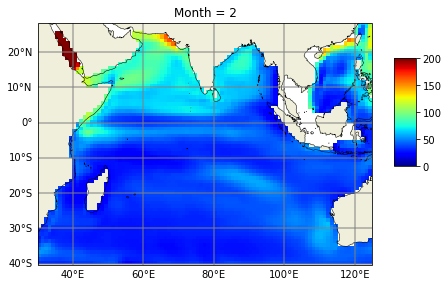

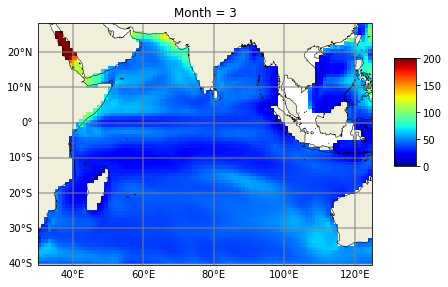

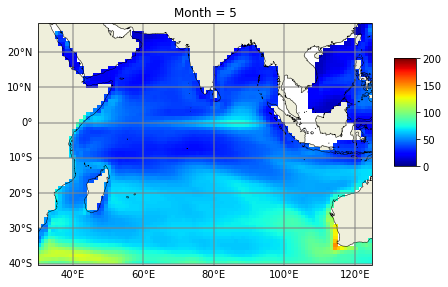

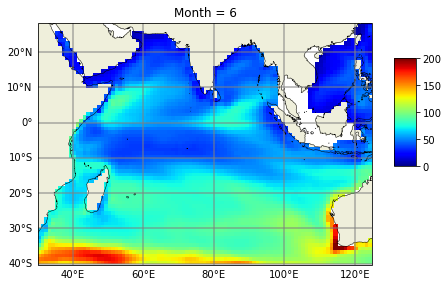

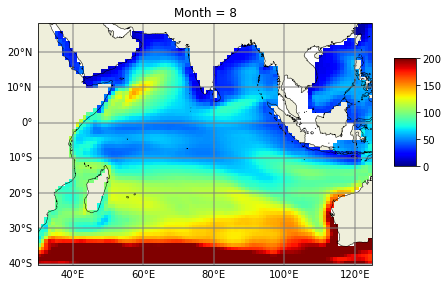

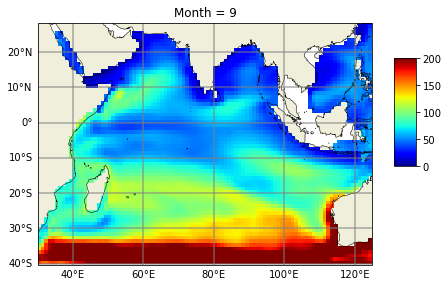

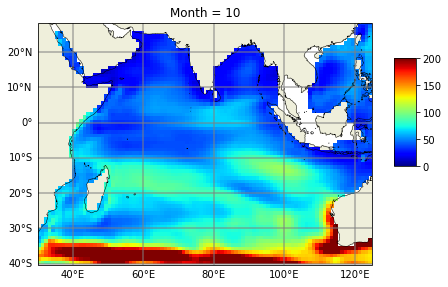

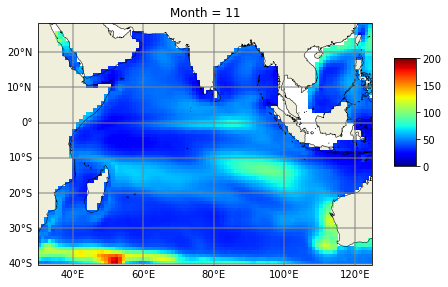

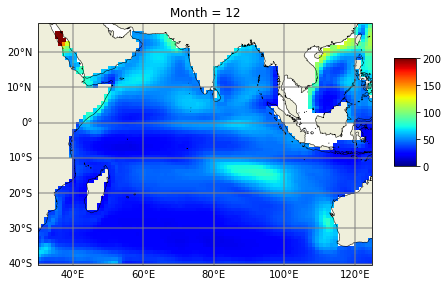

In [11]:
a = plot_var_c((gM), 0, 200, 'GODAS MLD ', 'jet')

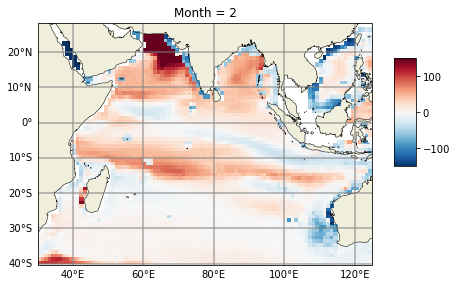

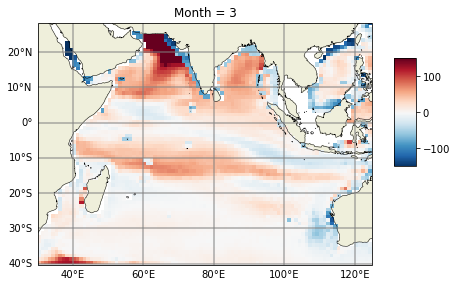

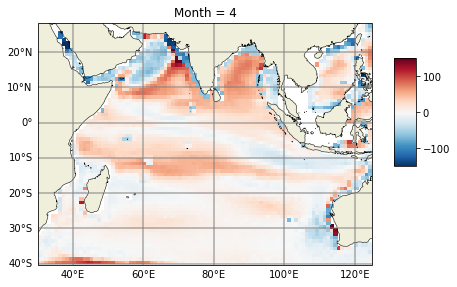

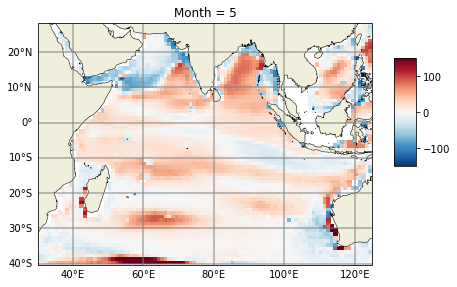

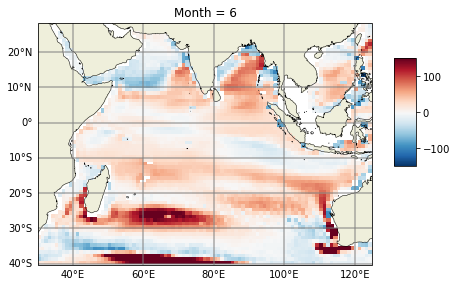

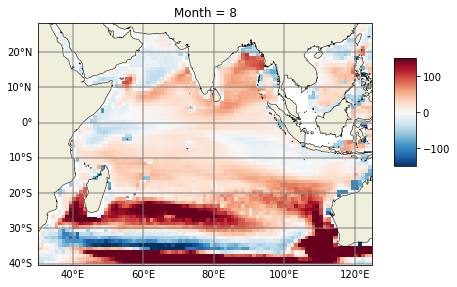

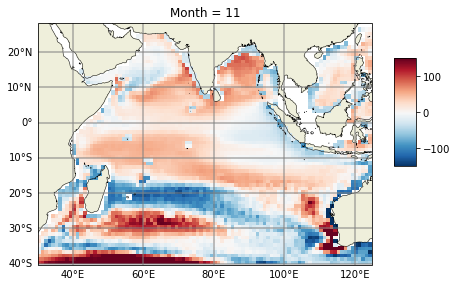

In [12]:
a = plot_var_c((aTCM - gTCM), -150, 150, 'ACCESS-CM2 - GODAS Thermocline diff', 'RdBu_r')

In [13]:
adT_clim

<xarray.DataArray '__xarray_dataarray_variable__' (month: 12, level: 27, lat: 70, lon: 95)>
[2154600 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 30.5 31.5 32.5 33.5 34.5 ... 121.5 122.5 123.5 124.5
  * lat      (lat) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 26.5 27.5 28.5 29.5
  * level    (level) float64 15.0 25.0 35.0 45.0 ... 343.3 427.3 536.7 665.4
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [14]:
#lets make a hovmoller plot of some fo this data


In [15]:
test = aTCM.sel(lat = slice(-10,10), lon = slice (50,70)).mean(['lat'])

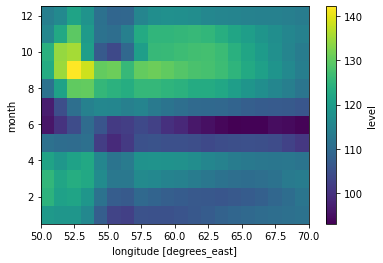

In [16]:
test.plot()

In [17]:
#load in wind data cliamtology
A_U = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/UAS/uas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').uas
A_V = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/VAS/vas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').vas
A_W = np.sqrt((A_U**2)+(A_V**2))
A_W = A_W.groupby('time.month').mean('time')
A_W = A_W.sel(lat=slice(-40,30),lon=slice(30,125))


In [18]:
#load in SST
A_SST = xr.open_dataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/TOS/tos_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').tos
A_SST = A_SST.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))

In [19]:
#load in wind data cliamtology
G_U = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/uwnd.10m.mon.mean.nc').uwnd
G_V = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/vwnd.10m.mon.mean.nc').vwnd
G_W = np.sqrt((G_U**2)+(G_V**2))
G_W = G_W.groupby('time.month').mean('time')
G_W = G_W.sel(lat=slice(-40,30),lon=slice(30,125))[:,0]


In [20]:
#load in SST
G_SST = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/sst_con.nc').sst
LSM = xr.open_dataset('/home/z5113258/Documents/GODAS/remapcon_1/lsmask_con.nc').mask
G_SST= G_SST.where(LSM[0])
G_SST = G_SST.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))


In [21]:
#load in ACCESS wind stress data
a_tu = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/tauuo/tauuo_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').tauuo
a_tv = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/tauvo/tauvo_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').tauvo
#calcualte total wind stress
A_TAU = np.sqrt((a_tu**2)+(a_tv**2))
A_TAU = A_TAU.groupby('time.month').mean('time')
A_TAU = A_TAU.sel(lat=slice(-40,30),lon=slice(30,125))
 

In [22]:
#calculate windstress curl =  ∂τy/∂x - ∂τx/∂y
def WSC(tx, ty):
    dtydx = ty.differentiate('lon') / (110e3 * np.cos(ty.lat * np.pi / 180))
    dtxdy = tx.differentiate('lat') / (110e3 )
    wsc = dtydx-dtxdy
    return wsc

In [23]:
#load in GODAS wind stress data
g_tu = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/uflx/*.nc').uflx
g_tv = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/vflx/*.nc').vflx
#calcualte total wind stress
G_TAU = np.sqrt((g_tu**2)+(g_tv**2))
G_TAU = G_TAU.groupby('time.month').mean('time')
G_TAU = G_TAU.sel(lat=slice(-40,30),lon=slice(30,125))
 

In [24]:
Awsc = WSC(a_tu, a_tv)
Awsc = Awsc.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))

In [25]:
Gwsc = WSC(g_tu, g_tv)
Gwsc = Gwsc.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))

In [26]:
Awsc[5].plot()

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


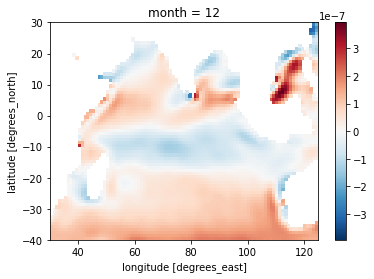

In [27]:
Gwsc[11].plot()

In [28]:
#load in Qnet term ACCESS
AQ = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_qnet.nc').sel(lat=slice(-40,30),lon=slice(30,125))

In [29]:
GQ = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_qnet.nc').sel(lat=slice(-40,30),lon=slice(30,125))

In [30]:
#load in compoenents of  heat budget
mT = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_dtdt.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mua = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_uadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mva = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_vadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mwa = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_wadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mq = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/climatology/AC_qnet.nc').sel(lat=slice(-40,30),lon=slice(30,125))
#obs heat budget
gT = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_dtdt.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gua = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_uadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gva = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_vadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gwa = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_wadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gq = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_qnet.nc').sel(lat=slice(-40,30),lon=slice(30,125))

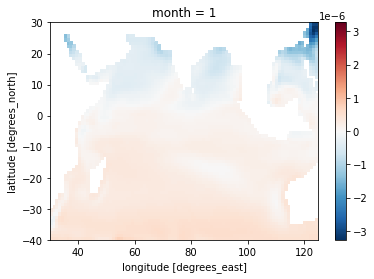

In [22]:
GQ[0].plot()

In [36]:
def get_region(DS, lat, lat_r, lon, lon_r):
    setio = DS.sel(lat=slice(lat, lat+lat_r),lon=slice(lon, lon+lon_r)).mean(['lat', 'lon'])
    return setio
def get_region_trans(DS, lat, lat_r, lon, lon_r):
    setio = DS.sel(lat=slice(lat, lat+lat_r),lon=slice(lon, lon+lon_r)).mean('lat')
    return setio

In [37]:
def plot_monthly(TC_M, W_M, SST_M, Q_m, TC_O, W_O, SST_O, Q_O, lat, lat_r, lon, lon_r, Region):    
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 16), sharex='all')

    axes[0].plot(W_M.month, get_region(W_M, lat, lat_r, lon, lon_r))
    axes[0].plot(W_O.month, get_region(W_O, lat, lat_r, lon, lon_r), c = 'k', ls = '--', lw = 0.75)
    axes[0].set_ylabel('Wind stress curl\n (nm$^{-3}$)')
    axes[0].set_title('(a)', loc='left')

    axes[1].plot(TC_M.month, get_region(TC_M, lat, lat_r, lon, lon_r))
    axes[1].plot(TC_O.month, get_region(TC_O, lat, lat_r, lon, lon_r), c = 'k', ls = '--', lw = 0.75)
    axes[1].set_ylabel('Thermocline depth \n (m)')
    axes[1].set_title('(b)', loc='left')

    axes[2].plot(SST_M.month, get_region(SST_M, lat, lat_r, lon, lon_r), label = 'Model')
    axes[2].plot(SST_O.month, get_region(SST_O, lat, lat_r, lon, lon_r), c = 'k', ls = '--', lw = 0.75, label = 'Reanalysis')
    axes[2].set_ylabel('Sea surface Temperature \n ($^{O}$C)')
    axes[2].set_xlabel('Month')
    axes[2].set_title('(c)', loc='left')
    
    axes[3].plot(Q_m.month, get_region(Q_m*(3986*1026*50), lat, lat_r, lon, lon_r), label = 'Model')
    axes[3].plot(Q_O.month, get_region(Q_O*(3986*1026*50), lat, lat_r, lon, lon_r), c = 'k', ls = '--', lw = 0.75, label = 'Reanalysis')
    axes[3].set_ylabel('net surface heat flux \n (wm$^-2$)')
    axes[3].set_xlabel('Month')
    axes[3].set_title('(c)', loc='left')
    axes[3].legend()
    
    #axes[4].plot(range(1,13), get_region((mT*(3986*1026*50)), lat, latr, lon, lonr), label = 'Temperature tendency')
    #axes[4].plot(range(1,13), get_region((mq*(3986*1026*50)), lat, latr, lon, lonr), label = 'Qnet')
    axes[4].plot(range(1,13), get_region((mua)*(-3986*1026*50), lat, lat_r, lon, lon_r), label = '-U Advection', c='tab:blue')
    axes[4].plot(range(1,13), get_region((mva)*(-3986*1026*50), lat, lat_r, lon, lon_r), label = '-V Advection', c='tab:orange')
    axes[4].plot(range(1,13), get_region((mwa)*(-3986*1026*50), lat, lat_r, lon, lon_r), label = '-W Advection', c='tab:green')
    #axes[4].plot(range(1,13), get_region((mq-(mua+mva+mwa))*(3986*1026*50), lat, latr, lon, lonr) ,label = 'Heat flux-Advection', c = 'k')
    #axes[4].plot(range(1,13), get_region((mua+mva+mwa)*(-3986*1026*50), lat, lat_r, lon, lon_r), label = '-Advection model')
    #axes[4].plot(range(1,13), get_region((gua+gva+gwa)*(-3986*1026*50), lat, lat_r, lon, lon_r), label = '-Advection GODAS', c = 'k', ls = '--', lw = 0.75)

    
    #axes[4].plot(range(1,13), get_region((gT*(3986*1026*50)), lat, latr, lon, lonr), label = 'Temperature tendency')
    #axes[4].plot(range(1,13), get_region((gq*(3986*1026*50)), lat, latr, lon, lonr), label = 'Qnet')
    axes[4].plot(range(1,13), get_region((gua)*(-3986*1026*50), lat, lat_r, lon, lon_r), c='tab:blue', ls = '--', lw = 0.75)
    axes[4].plot(range(1,13), get_region((gva)*(-3986*1026*50), lat, lat_r, lon, lon_r),  c='tab:orange', ls = '--', lw = 0.75)
    axes[4].plot(range(1,13), get_region((gwa)*(-3986*1026*50), lat, lat_r, lon, lon_r), c='tab:green', ls = '--', lw = 0.75)    
    #axes[4].plot(range(1,13), get_region((gq-(gua+gva+gwa))*(3986*1026*50), lat, latr, lon, lonr) ,label = 'Heat flux-Advection', c = 'k')
    axes[4].set_ylabel('heat flux \n (wm$^-2$)')
    axes[4].set_xlabel('Month')
    axes[4].axhline(0, c = 'k', ls = '--', lw = 0.5, alpha = 0.5)

    axes[4].legend(bbox_to_anchor=(1.25, 0), loc='lower right')
    
    plt.suptitle(Region)
    return fig


/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


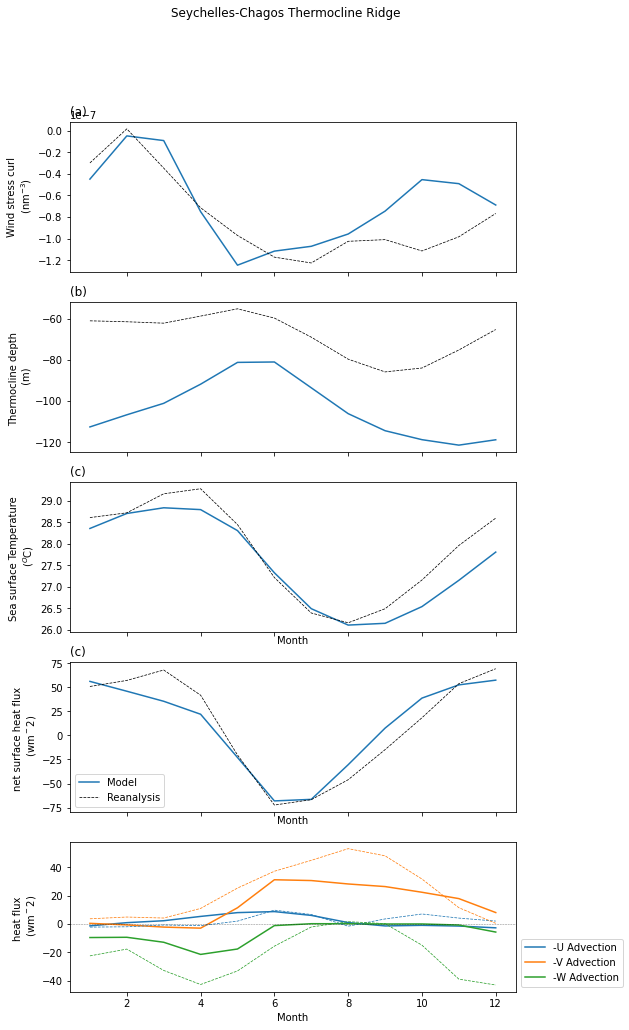

In [38]:
a = plot_monthly(-aTCM, Awsc, A_SST, AQ, -gTCM, Gwsc, G_SST, GQ, -12, 7, 50, 20, 'Seychelles-Chagos Thermocline Ridge')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


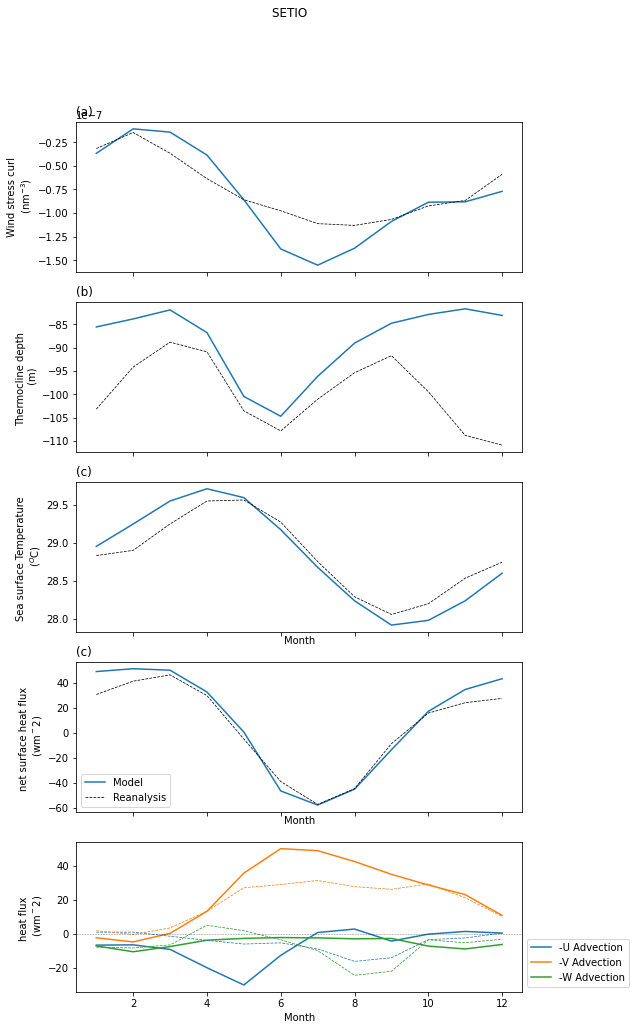

In [43]:
a = plot_monthly(-aTCM, Awsc, A_SST, AQ, -gTCM, Gwsc, G_SST, GQ, -10, 10, 90, 20, 'SETIO ')

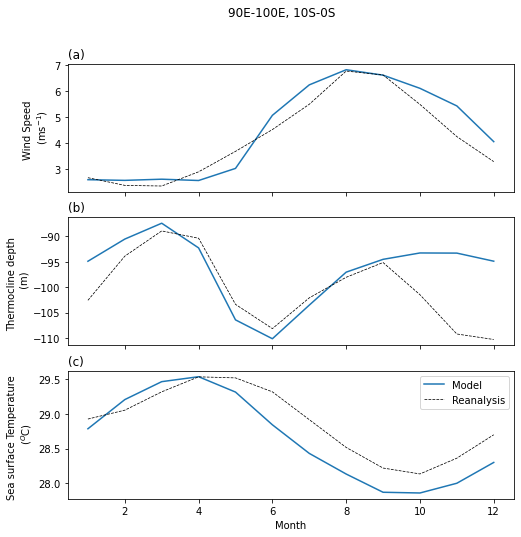

In [22]:
a = plot_monthly(-aTCM, A_W, A_SST,-gTCM, G_W, G_SST, -10, 10, 90, 10, '90E-100E, 10S-0S ')

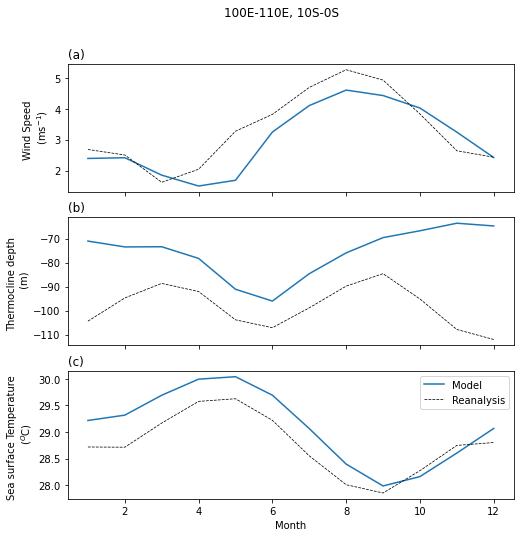

In [21]:
a = plot_monthly(-aTCM, A_W, A_SST,-gTCM, G_W, G_SST, -10, 10, 100, 10, '100E-110E, 10S-0S ')

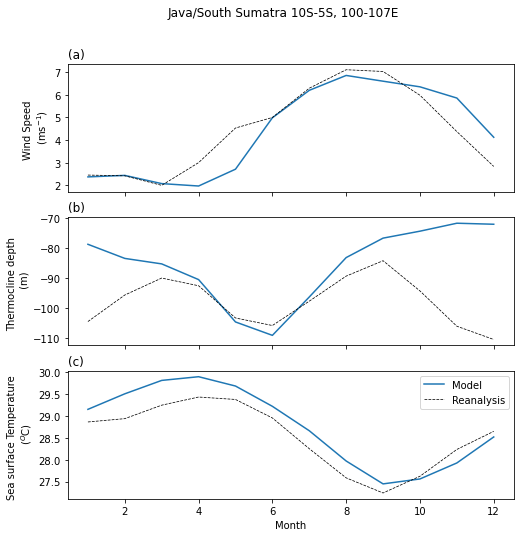

In [23]:

a = plot_monthly(-aTCM, A_W, A_SST,-gTCM, G_W, G_SST, -10,5,100,7, 'Java/South Sumatra 10S-5S, 100-107E')

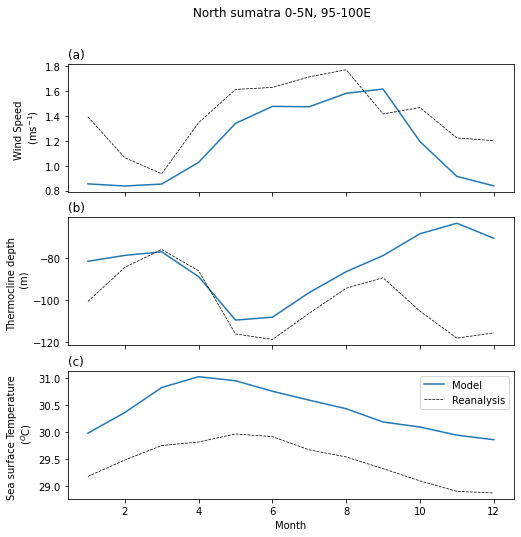

In [24]:
a = plot_monthly(-aTCM, A_W, A_SST,-gTCM, G_W, G_SST, 0,5,95,5, 'North sumatra 0-5N, 95-100E ')

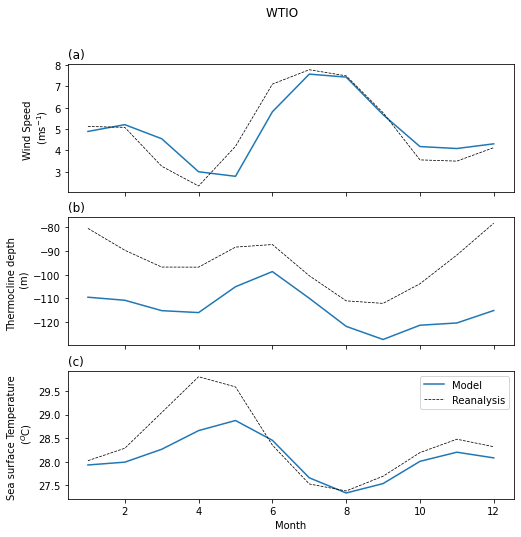

In [22]:
a = plot_monthly(-aTCM, A_W, A_SST, -gTCM, G_W, G_SST,-10, 20, 50, 20, 'WTIO ')

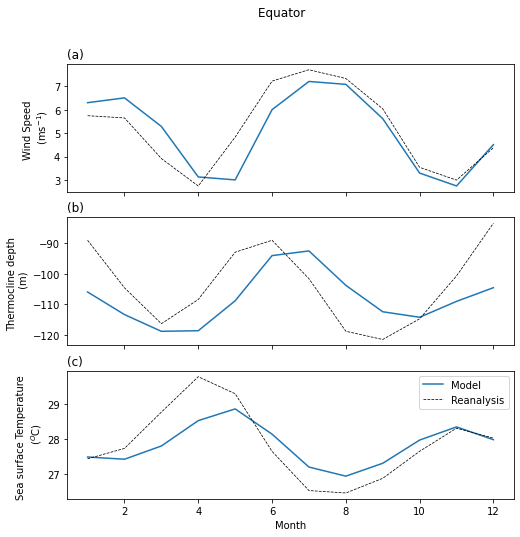

In [28]:
a = plot_monthly(-aTCM, A_W, A_SST, -gTCM, G_W, G_SST, -5, 10, 40, 20, 'Equator ')

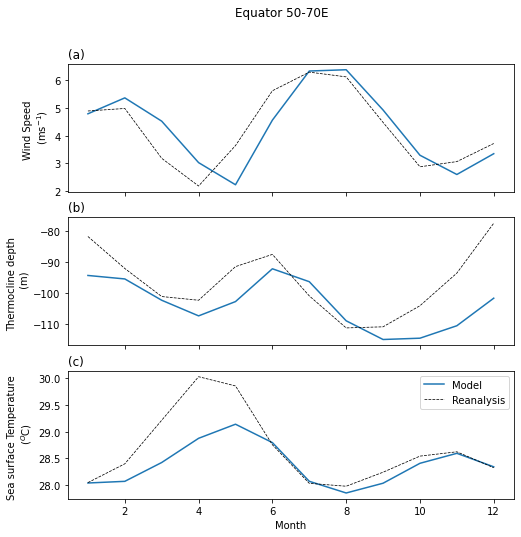

In [25]:
a = plot_monthly(-aTCM, A_W, A_SST, -gTCM, G_W, G_SST, -5, 10, 50, 20, 'Equator 50-70E ')

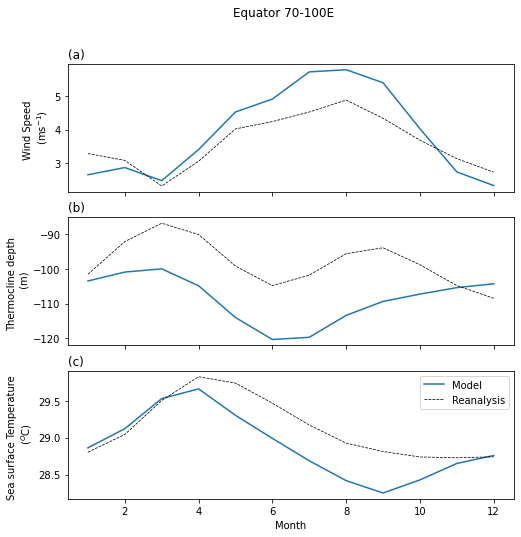

In [26]:
a = plot_monthly(-aTCM, A_W, A_SST, -gTCM, G_W, G_SST, -5, 10, 70, 30, 'Equator 70-100E')

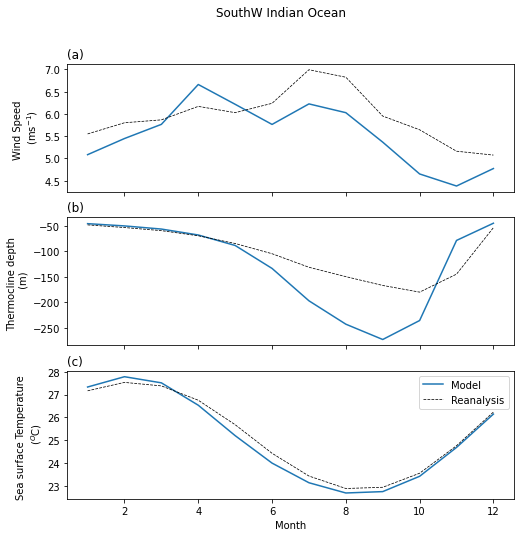

In [24]:
a = plot_monthly(-aTCM, A_W, A_SST, -gTCM, G_W, G_SST, -25, 5, 50, 15, 'SouthW Indian Ocean ')

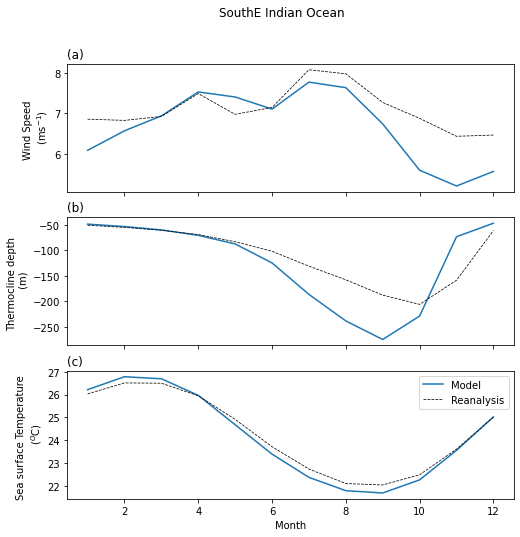

In [25]:
a = plot_monthly(-aTCM, A_W, A_SST, -gTCM, G_W, G_SST, -25, 5, 65, 15, 'SouthE Indian Ocean ')

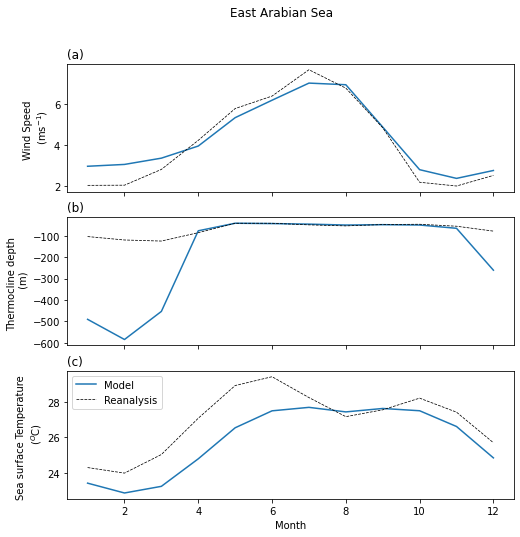

In [26]:
a = plot_monthly(-aTCM, A_W, A_SST, -gTCM, G_W, G_SST, 20, 7, 60, 5, 'East Arabian Sea ')

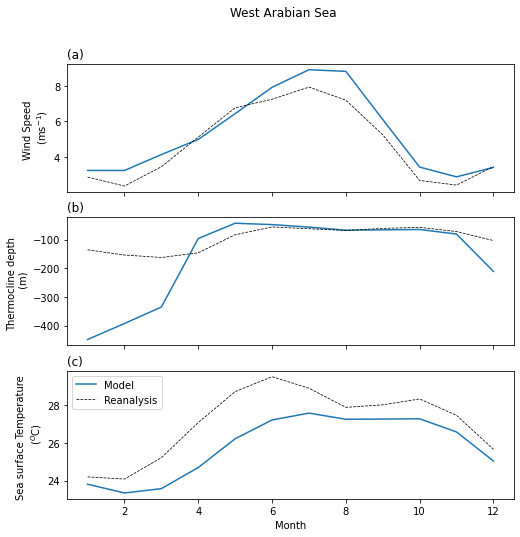

In [27]:
a = plot_monthly(-aTCM, A_W, A_SST, -gTCM, G_W, G_SST, 20, 7, 65, 5, 'West Arabian Sea')

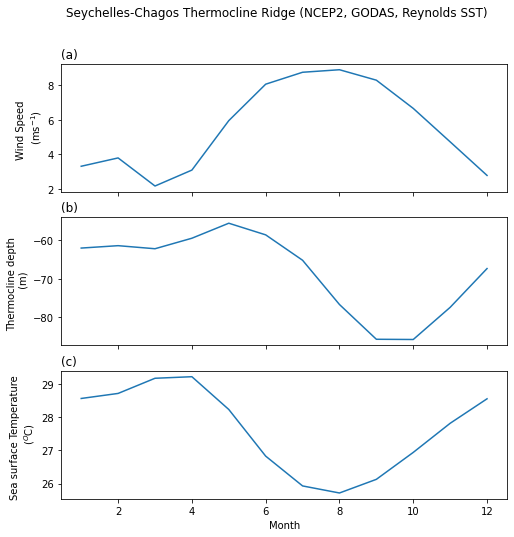

In [134]:
a = plot_monthly(-gTCM, G_W, G_SST, -12, 7, 50, 10, 'Seychelles-Chagos Thermocline Ridge (NCEP2, GODAS, Reynolds SST)')

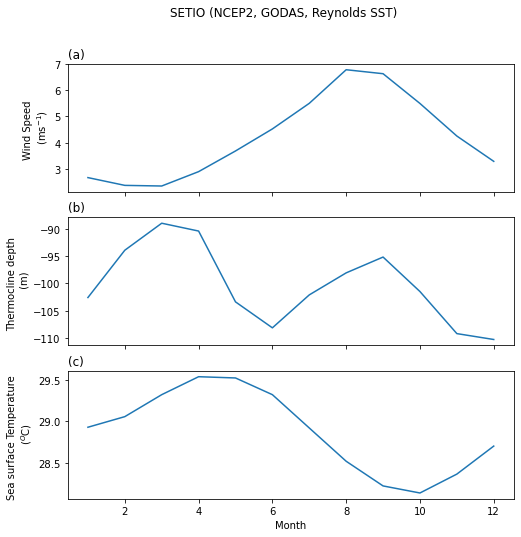

In [145]:
a = plot_monthly(-gTCM, G_W, G_SST, -10, 10, 90, 10, 'SETIO (NCEP2, GODAS, Reynolds SST)')

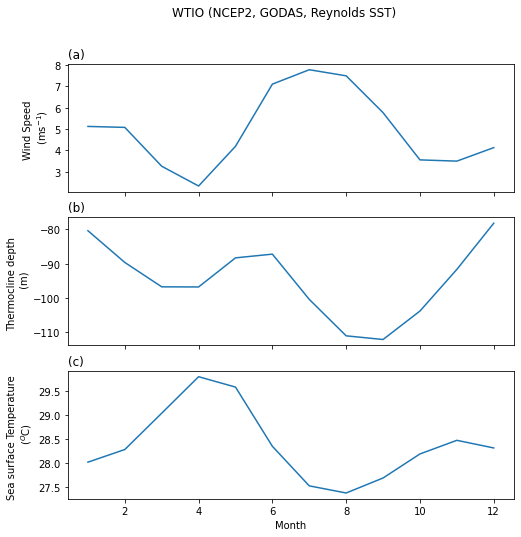

In [146]:
a = plot_monthly(-gTCM, G_W, G_SST, -10, 20, 50, 20, 'WTIO (NCEP2, GODAS, Reynolds SST)')

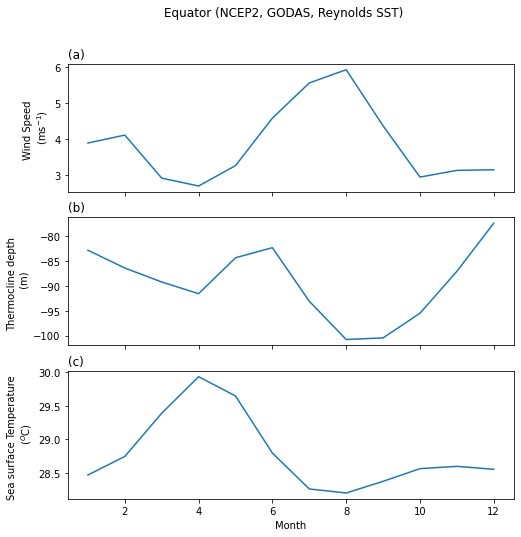

In [147]:
a = plot_monthly(-gTCM, G_W, G_SST, -5, 5, 50, 30, 'Equator (NCEP2, GODAS, Reynolds SST)')

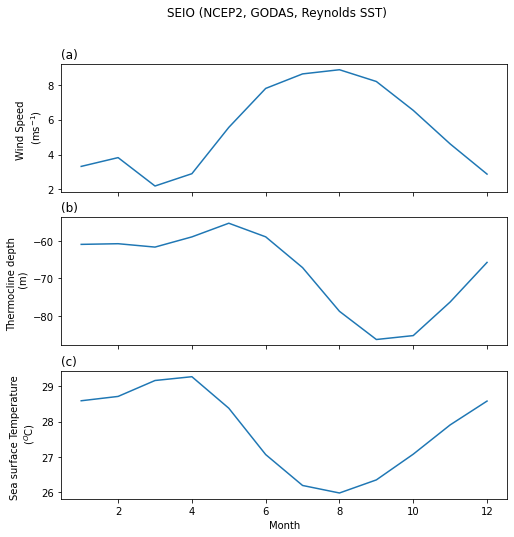

In [148]:
a = plot_monthly(-gTCM, G_W, G_SST, -12, 7, 50, 15, 'SEIO (NCEP2, GODAS, Reynolds SST)')

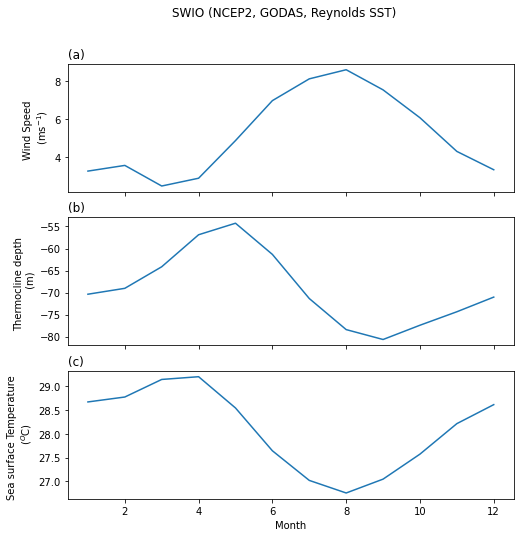

In [149]:
a = plot_monthly(-gTCM, G_W, G_SST, -12, 7, 65, 15, 'SWIO (NCEP2, GODAS, Reynolds SST)')

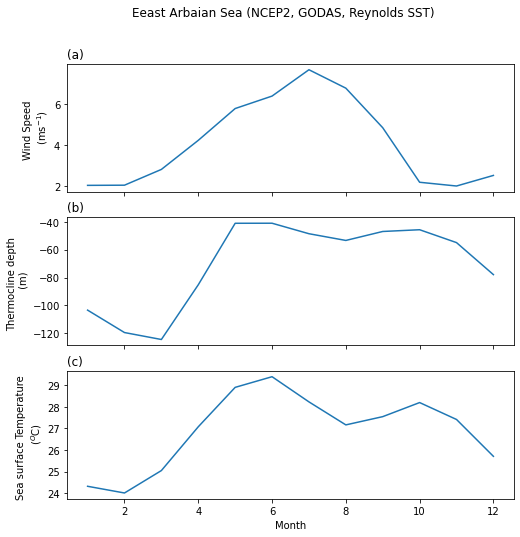

In [144]:
a = plot_monthly(-gTCM, G_W, G_SST, 20, 7, 60, 5, 'Eeast Arbaian Sea (NCEP2, GODAS, Reynolds SST)')

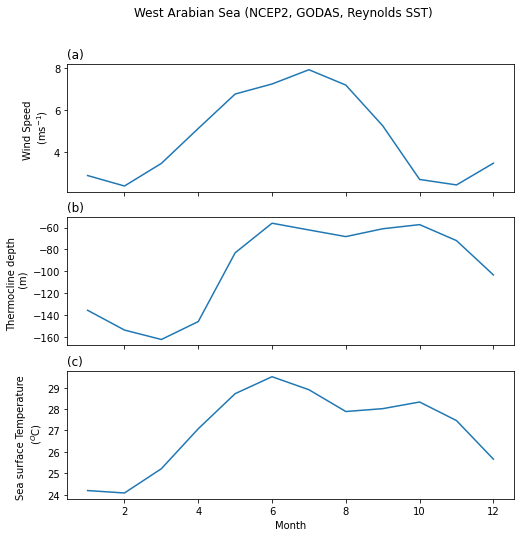

In [143]:
a = plot_monthly(-gTCM, G_W, G_SST, 20, 7, 65, 5, 'West Arabian Sea (NCEP2, GODAS, Reynolds SST)')

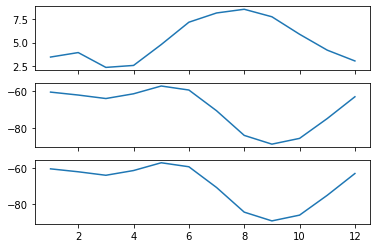

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')

axes[0].plot(G_W.month, get_region(G_W, -12,8,55,10))
axes[1].plot(G_W.month, get_region(-1*gTCM, -12,8,55,10))
axes[2].plot(G_W.month, get_region(-1*gTCM, -12,8,55,10))


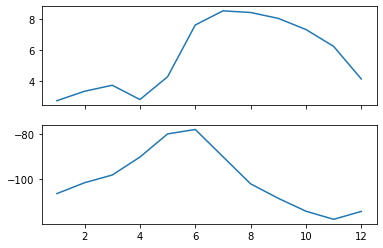

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex='all')

axes[0].plot(A_W.month, get_region(A_W, -12,8,55,10))
axes[1].plot(A_W.month, get_region(-1*aTC, -12,8,55,10))

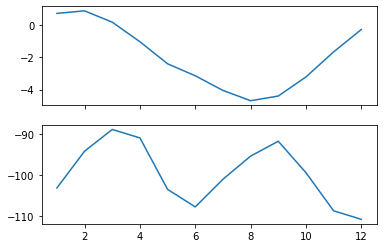

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex='all')
G_U1 = G_U.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))[:,0]
axes[0].plot(G_U1.month, get_region(G_U1, -10,10,90,20))
axes[1].plot(G_W.month, get_region(-1*gTCM, -10,10,90,20))

Text(0.5, 0.98, 'test')

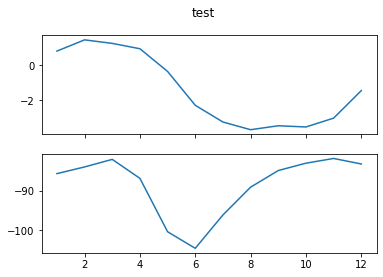

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex='all')
A_U1 = A_U.groupby('time.month').mean('time').sel(lat=slice(-40,30),lon=slice(30,125))
axes[0].plot(A_U1.month, get_region(A_U1, -10,10,90,20))
axes[1].plot(A_W.month, get_region(-1*aTCM, -10,10,90,20))
plt.suptitle('test')

In [172]:
from scipy.stats import pearsonr

In [176]:
def multi_apply_along_axis(func1d, axis, arrs, *args, **kwargs):
    """
    Given a function `func1d(A, B, C, ..., *args, **kwargs)`  that acts on 
    multiple one dimensional arrays, apply that function to the N-dimensional
    arrays listed by `arrs` along axis `axis`
    
    If `arrs` are one dimensional this is equivalent to::
    
        func1d(*arrs, *args, **kwargs)
    
    If there is only one array in `arrs` this is equivalent to::
    
        numpy.apply_along_axis(func1d, axis, arrs[0], *args, **kwargs)
        
    All arrays in `arrs` must have compatible dimensions to be able to run
    `numpy.concatenate(arrs, axis)`
    
    Arguments:
        func1d:   Function that operates on `len(arrs)` 1 dimensional arrays,
                  with signature `f(*arrs, *args, **kwargs)`
        axis:     Axis of all `arrs` to apply the function along
        arrs:     Iterable of numpy arrays
        *args:    Passed to func1d after array arguments
        **kwargs: Passed to func1d as keyword arguments
    """
    # Concatenate the input arrays along the calculation axis to make one big
    # array that can be passed in to `apply_along_axis`
    carrs = numpy.concatenate(arrs, axis)
    
    # We'll need to split the concatenated arrays up before we apply `func1d`,
    # here's the offsets to split them back into the originals
    offsets=[]
    start=0
    for i in range(len(arrs)-1):
        start += arrs[i].shape[axis]
        offsets.append(start)
            
    # The helper closure splits up the concatenated array back into the components of `arrs`
    # and then runs `func1d` on them
    def helperfunc(a, *args, **kwargs):
        arrs = numpy.split(a, offsets)
        return func1d(*[*arrs, *args], **kwargs)
    
    # Run `apply_along_axis` along the concatenated array
    return numpy.apply_along_axis(helperfunc, axis, carrs, *args, **kwargs)

In [231]:
import numpy
C, P = multi_apply_along_axis(pearsonr, 0, [-1*gTCM.fillna(9999), G_SST.fillna(9999)])


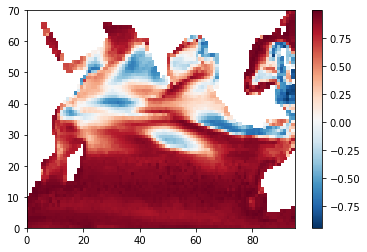

In [232]:
plt.pcolormesh(C, cmap = 'RdBu_r')
plt.colorbar()

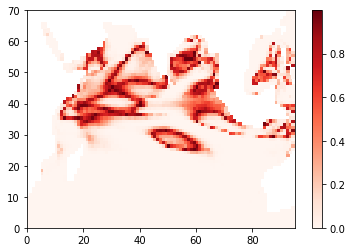

In [233]:
plt.pcolormesh(P, cmap = 'Reds')
plt.colorbar()

In [31]:
def plot_background(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 125., -30., 20.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5,)
    gl.top_labels = False
    gl.right_labels = False
    if i == 5:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax

In [32]:
def plot_var(vari, vmin, vmax, name):
    lons = vari.lon
    lats = vari.lat
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), sharey='all', sharex='all', 
                                 subplot_kw={'projection':ccrs.PlateCarree()})
    for i in range(0,6):

        axes[i, 0].pcolormesh(lons, lats, (vari).sel(month = i+1), cmap = 'RdBu_r', 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,0], i, 0)
        mon = i+1
        axes[i, 0].set_title('Month = '+str(mon))
        #2nd collumn
        im = axes[i, 1].pcolormesh(lons, lats, (vari).sel(month = i+7), cmap = 'RdBu_r', 
                                    #colorbar=True, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,1], i, 1)
        mon2 = i+7
        axes[i, 1].set_title('Month = '+str(mon2))
    cbar_ax = fig.add_axes([0.95, 0.45, 0.05, 0.25])
    fig.colorbar(im, cax=cbar_ax)
    axes[0,0].text(1.5,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
            rotation='horizontal', rotation_mode='anchor',
            transform=axes[0,0].transAxes)
    return fig

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

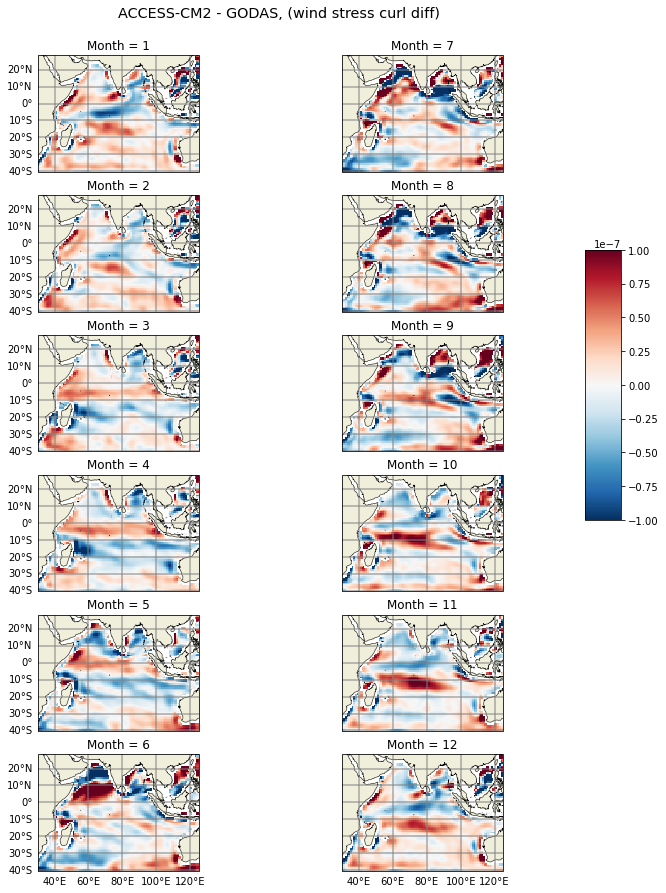

In [34]:
a = plot_var((Awsc-Gwsc), -1e-7, 1e-7, 'ACCESS-CM2 - GODAS, (wind stress curl diff)')